# Lista 5

### Zaimportowane biblioteki

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Zadanie 1

In [21]:
# def newtonMethod(xs, ys):
#     n = len(xs)
#     a = ys.copy()
#     for k in range(1, n):
#         a[k:n] = (a[k:n]-a[k-1])/(xs[k:n]-xs[k-1])
#     return a

def lagrangeMethod(xs, ys):
    y = ys
    n = len(xs)
    V = np.array([np.ones(n)])
    for i in range(1, n):
        V = np.append(V, [xs**i], axis=0)
    a = np.linalg.inv(V.T)@y
    return a


In [22]:
xData = np.array([0,3,6])
yData = np.array([1.225, 0.905, 0.652])

coeffs = lagrangeMethod(xData, yData)
coeffsBuiltIn = np.polyfit(xData, yData, deg=2)
print(f"Współczynniki wielomianu wyliczone za pomocą metody Lagrange'a: a2 = {coeffs[2]:.4f}, a1 = {coeffs[1]:.4f}, a0 = {coeffs[0]:.4f}")
print(f"Współczynniki wielomianu wyliczone za pomocą metody wbudowanej: a2 = {coeffsBuiltIn[0]:.4f}, a1 = {coeffsBuiltIn[1]:.4f}, a0 = {coeffsBuiltIn[2]:.4f}")

Współczynniki wielomianu wyliczone za pomocą metody Lagrange'a: a2 = 0.0037, a1 = -0.1178, a0 = 1.2250
Współczynniki wielomianu wyliczone za pomocą metody wbudowanej: a2 = 0.0037, a1 = -0.1178, a0 = 1.2250


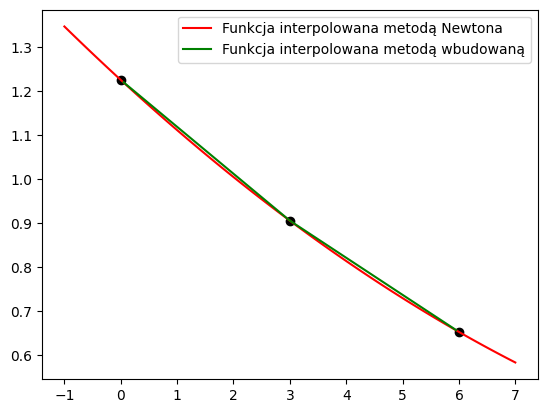

In [23]:
xs = np.linspace(-1,7,100)

builtInF = sp.interpolate.interp1d(xData, yData, bounds_error=False)
builtInYs = builtInF(xs)
plt.plot(xs, coeffs[2]*xs**2 + coeffs[1]*xs + coeffs[0], c='r', label = 'Funkcja interpolowana metodą Newtona')    
plt.plot(xs, builtInYs, c='g', label='Funkcja interpolowana metodą wbudowaną')
plt.scatter(xData, yData , c='black')
plt.legend()    


### Zadanie 2

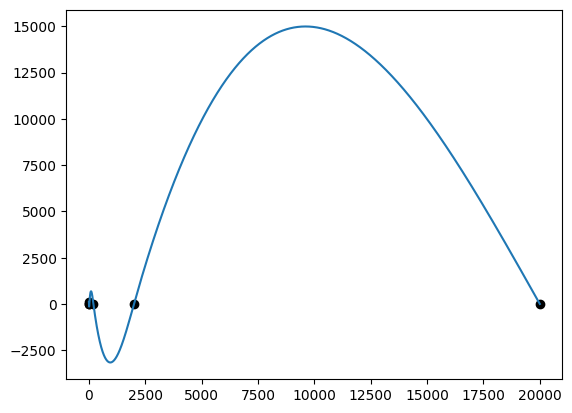

In [24]:
xData = [0.2,2,20,200,2000,20000]
yData = [103, 13.9, 2.72, 0.8, 0.401, 0.433]

cs = sp.interpolate.CubicSpline(xData,yData, bc_type='natural')
xs = np.linspace(0, 20000, 20000)
ys = cs(xs)

plt.plot(xs, ys)
plt.scatter(xData, yData, c='black')

In [25]:
print(cs(5))
print(cs(50))
print(cs(5000))

-88.94021032085111
458.2884212067051
9920.955712424346


### Zadanie 3

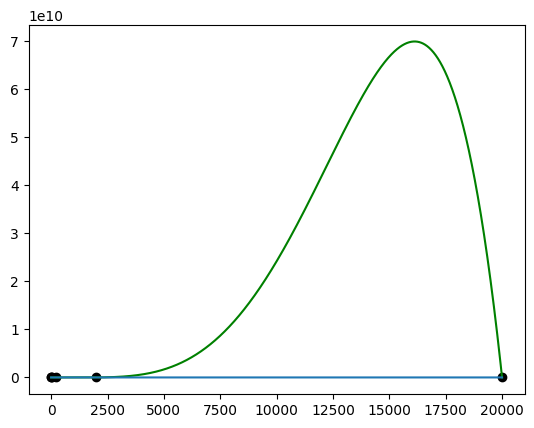

In [41]:
xData = np.array([0.2,2,20,200,2000,20000])
yData = np.array([103, 13.9, 2.72, 0.8, 0.401, 0.433])

coeffs = lagrangeMethod(xData, yData)

xs = np.linspace(0, 20000, 20000)
ys = coeffs[5]*xs**5 + coeffs[4]*xs**4 + coeffs[3]*xs**3 + coeffs[2]*xs**2 + coeffs[1]*xs + coeffs[0]

cs = sp.interpolate.CubicSpline(xData,yData, bc_type='natural')
ys1 = cs(xs)

plt.plot(xs,ys,'green')
plt.plot(xs, ys1)
plt.scatter(xData, yData, c='black')

In [27]:
xs = np.array([5, 50, 5000])
ys = coeffs[5]*xs**5 + coeffs[4]*xs**4 + coeffs[3]*xs**3 + coeffs[2]*xs**2 + coeffs[1]*xs + coeffs[0]
print(ys[0])
print(ys[1])
print(ys[2])

-96.10046210844665
2581.144117154329
62876193.599332534


### Zadanie 4

In [28]:
xData = np.array([1.2, 2.8, 4.3, 5.4, 6.8, 7.9])
yData = np.array([7.5, 16.1, 38.9, 67.0, 146.6, 266.2])

yLog = np.log(yData)
xMean = np.mean(xData)
yLogMean = np.mean(yLog)
beta1 = np.sum(xData*(yLog-yLogMean))/np.sum((xData-xMean)**2)
beta0 = yLogMean-beta1*xMean

Odchylenie standardowe wynosi: 1.64


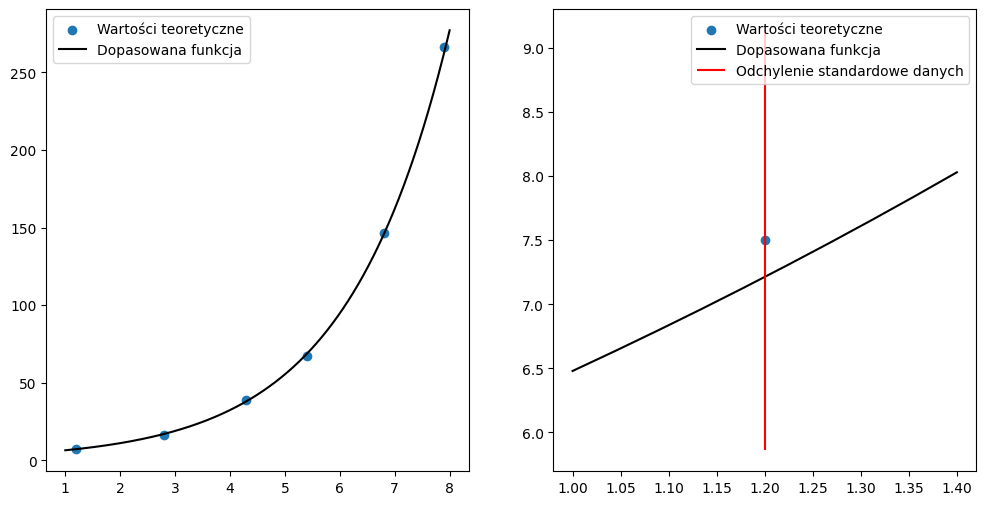

In [29]:
xs = np.linspace(1, 8, 1000)
ys = np.exp(beta0+beta1*xs)
diffs = yData-np.exp(beta0+beta1*xData)
std = np.std(diffs)
print(f'Odchylenie standardowe wynosi: {std:.2f}')
fig,ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(xData, yData, label='Wartości teoretyczne')
ax[0].plot(xs, ys, label='Dopasowana funkcja', color='black')
ax[0].legend()
ax[1].scatter(xData[0], yData[0], label='Wartości teoretyczne')
xs = np.linspace(1, 1.4, 10)
ys = np.exp(beta0+beta1*xs)
ax[1].plot(xs,ys,label='Dopasowana funkcja', color='black')
ax[1].vlines(x=1.2, ymin=yData[0]-std, ymax=yData[0]+std, color='r', label='Odchylenie standardowe danych')
ax[1].legend()

### Zadanie 5

In [30]:
def partial_elimination(A,b):
    A = np.array(A).astype(float)
    b = np.array(b).astype(float)
    n = len(b)
    row_idx = 0
    col_idx = 0
    for i in range(n-1):
        col_nums = []
        col_nums.append(A[row_idx:,i])
        col_max = np.max(col_nums)
        pivot_row = np.argwhere(A[:,col_idx]==col_max)[-1][0]
        A[[row_idx, pivot_row]] = A[[pivot_row, row_idx]]
        b[[row_idx, pivot_row]] = b[[pivot_row, row_idx]]
        for k in range(row_idx, n-1):
            lam = A[k+1,col_idx]/A[row_idx,col_idx]
            A[k+1, :] = A[k+1, :] - lam*A[row_idx, :]
            b[k+1] = b[k+1] - lam*b[row_idx]
        row_idx += 1
        col_idx += 1  
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(A[k,k+ 1:n],b[k+ 1:n]))/A[k,k] 
    return A, b 

Wartość lepkości wody dla T = 10: 1.43
Wartość lepkości wody dla T = 30: 0.89
Wartość lepkości wody dla T = 60: 0.44
Wartość lepkości wody dla T = 90: 0.30


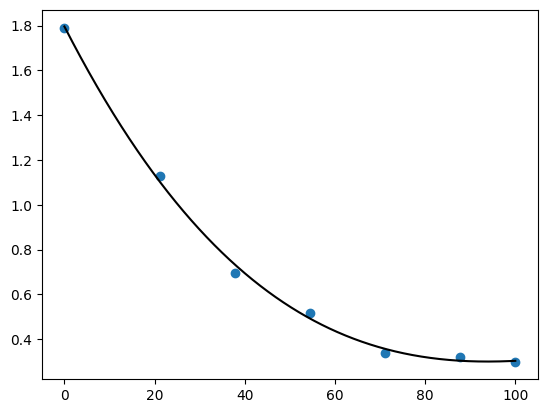

In [31]:
xData = np.array([0, 21.1, 37.8, 54.4, 71.1, 87.8, 100])
yData = np.array([1.79, 1.13, 0.696, 0.519, 0.338, 0.321, 0.296])

n=len(xData)
A = np.array([[n, np.sum(xData), np.sum(xData**2), np.sum(xData**3)],
     [np.sum(xData), np.sum(xData**2), np.sum(xData**3), np.sum(xData**4)],
     [np.sum(xData**2), np.sum(xData**3), np.sum(xData**4), np.sum(xData**5)],
     [np.sum(xData**3), np.sum(xData**4), np.sum(xData**5), np.sum(xData**6)]])
b = np.array([np.sum(yData), np.sum(xData*yData), np.sum(yData*xData**2), np.sum(yData*xData**3)])

_, coeffs = partial_elimination(A, b.T)

def poly(x):
    return coeffs[3]*x**3 + coeffs[2]*x**2 + coeffs[1]*x + coeffs[0]

xs = np.linspace(0, 100, 1000)
ys = poly(xs)

plt.plot(xs, ys, color='black')
plt.scatter(xData, yData)
print(f'Wartość lepkości wody dla T = 10: {poly(10):.2f}')
print(f'Wartość lepkości wody dla T = 30: {poly(30):.2f}')
print(f'Wartość lepkości wody dla T = 60: {poly(60):.2f}')
print(f'Wartość lepkości wody dla T = 90: {poly(90):.2f}')

### Zadanie 6

In [32]:
xData = np.array([1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7])
yData = np.array([6.008, 15.722, 27.13, 33.772, 5.257, 9.549, 11.098, 28.828])

#### Funkcja liniowa

In [33]:
n=len(xData)
A = np.array([[n, np.sum(xData)],
     [np.sum(xData), np.sum(xData**2)]])
b = np.array([np.sum(yData), np.sum(xData*yData)])

_, coeffs = partial_elimination(A, b.T)

def poly(x):
    return coeffs[1]*x + coeffs[0]

xs = np.linspace(0, 4, 1000)
ys = poly(xs)

#### Funkcja kwadratowa

In [34]:
n=len(xData)
A = np.array([[n, np.sum(xData), np.sum(xData**2)],
     [np.sum(xData), np.sum(xData**2), np.sum(xData**3)],
     [np.sum(xData**2), np.sum(xData**3), np.sum(xData**4)]])
b = np.array([np.sum(yData), np.sum(xData*yData), np.sum(yData*xData**2)])

_, coeffs2 = partial_elimination(A, b.T)

def poly2(x):
    return coeffs2[2]*x**2 + coeffs2[1]*x + coeffs2[0]

xs = np.linspace(0, 4, 1000)
ys2 = poly2(xs)

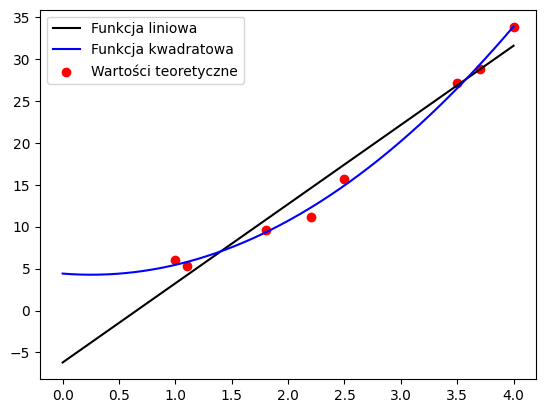

In [35]:
plt.plot(xs, ys, label='Funkcja liniowa', color='black')
plt.plot(xs, ys2, label='Funkcja kwadratowa', color='blue')
plt.scatter(xData, yData, label='Wartości teoretyczne', color='red')
plt.legend()

#### Odchylenie standardowe

In [36]:
lin_std = np.std(yData-poly(xData))
quad_std = np.std(yData-poly2(xData))
print(f'Odchylenie standardowe dla funkcji liniowej wynosi: {lin_std:.2f}')
print(f'Odchylenie standardowe dla funkcji kwadratowej wynosi: {quad_std:.2f}')

Odchylenie standardowe dla funkcji liniowej wynosi: 1.94
Odchylenie standardowe dla funkcji kwadratowej wynosi: 0.64
